<a href="https://colab.research.google.com/github/suhaibkq/EDA-Multivariate-Techniques/blob/main/PYF_Project_LearnerNotebook_LowCode_Learner_Filled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

# Importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2  -q --user
!pip install pandas==1.5.3  -q --user
!pip install matplotlib==3.7.1 -q --user
!pip install seaborn==0.13.1 -q --user

#numpy==1.25.2  pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the structure of the data

In [ ]:
# Mounting google personal drive where the notebook and data file is stored

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data from G-Drive:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
# To returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Check the shape of the dataset i.e rows and columns in data set
df.shape

(1898, 9)

# What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# Are there any missing values in the data?

In [ ]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


# Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


# How many orders are not rated?

In [ ]:
# Tiltle of the rating col is "rating" and the missing rating is mentioned as "Not given"
df['rating'].value_counts()['Not given']

736

# Exploratory Data Analysis (EDA)

### Univariate Analysis

# Explore all the variables and provide observations on their distributions.

(Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Names count
df['restaurant_name'].nunique()

178

#### Cuisine type

In [ ]:
# Check unique cuisine type count
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

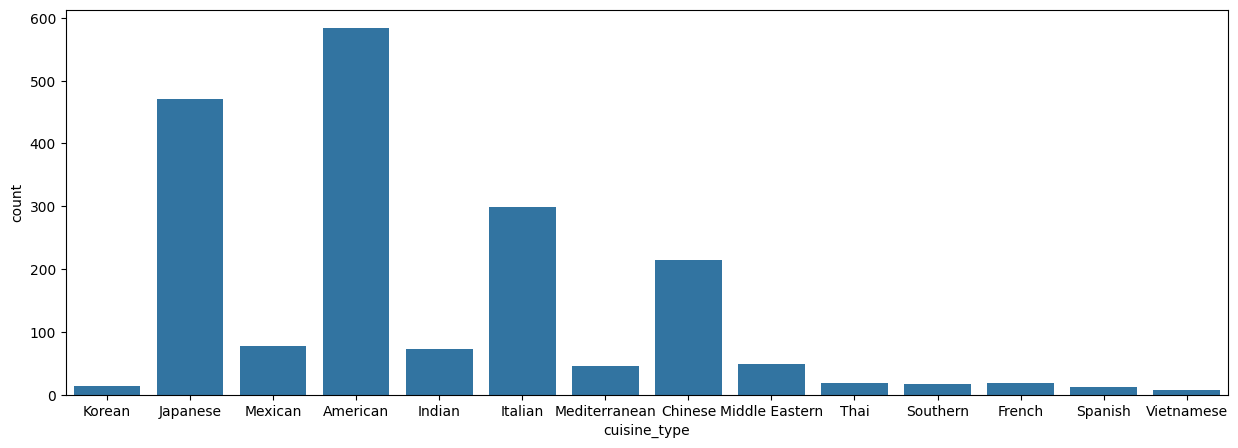

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Creates a countplot for cuisine type.

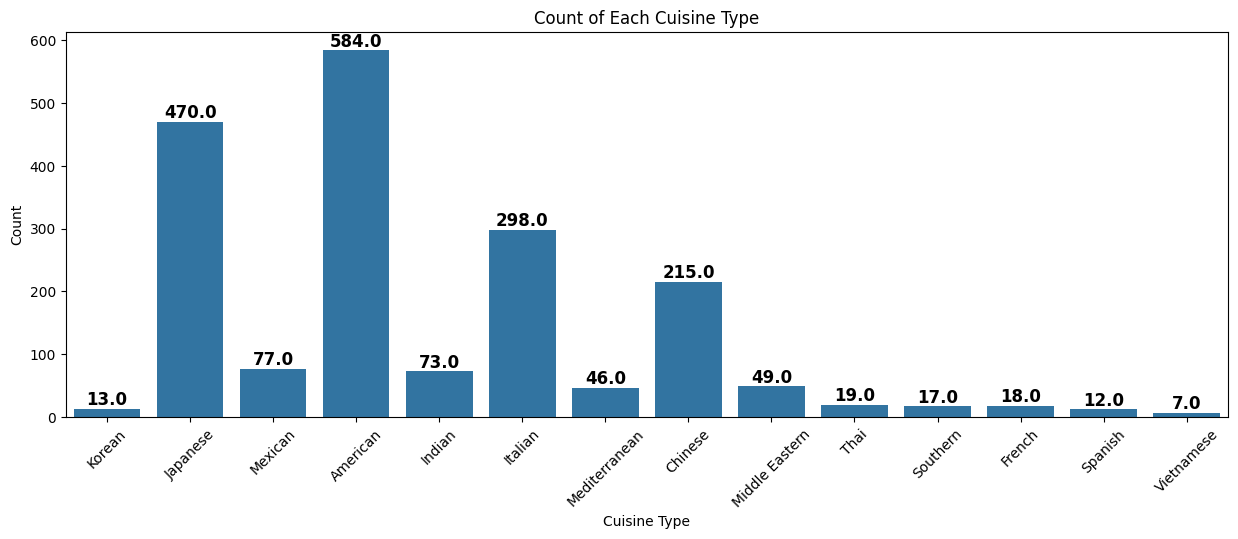

In [ ]:
# following is the code to show the count for each category and show it on bars in the graph:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='cuisine_type')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Count of Each Cuisine Type')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


#### Cost of the order

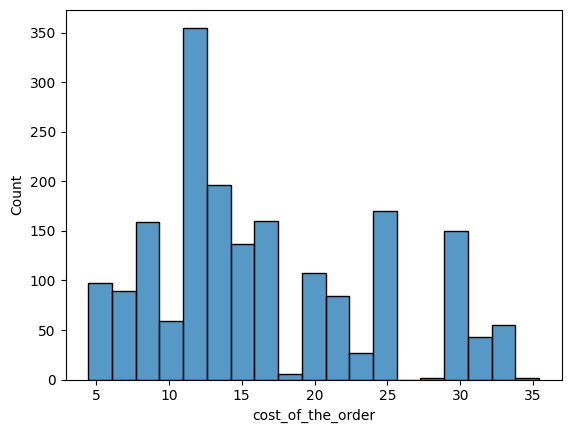

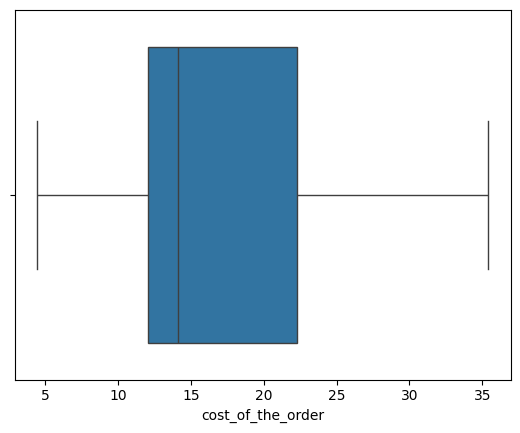

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
df['day_of_the_week'].unique() # this code will display unique entries in the column named "day_of_the_week"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

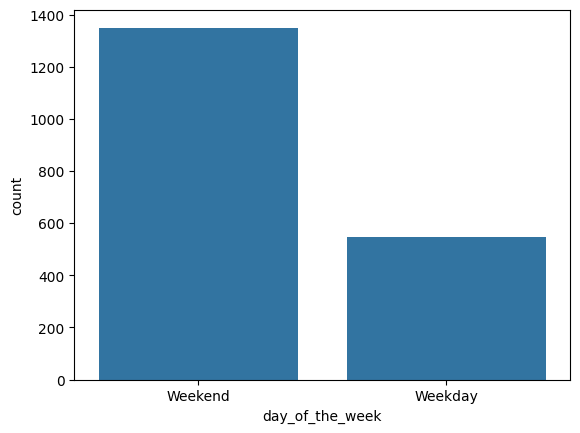

In [ ]:
# Plot a bar graph for 'day_of_the_week' column
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = df, x = 'day_of_the_week')

In [ ]:
# Find the exact count of above bar graphs:
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


#### Rating

In [ ]:
## Code to check unique values for the 'rating' column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

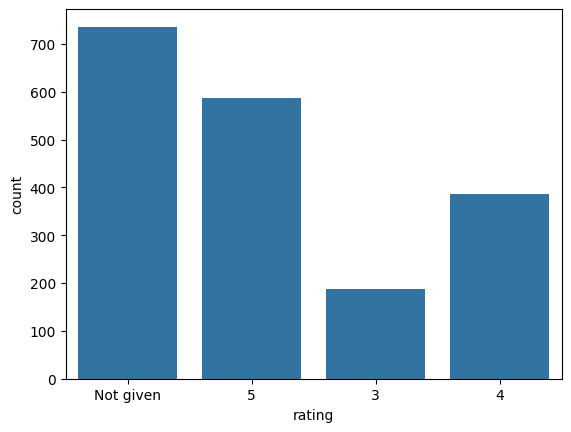

In [ ]:
# Code to plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating')

In [ ]:
# To have the count of rating:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Cost of the Order

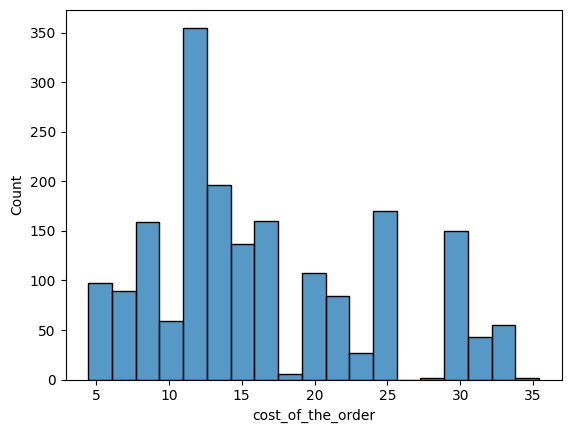

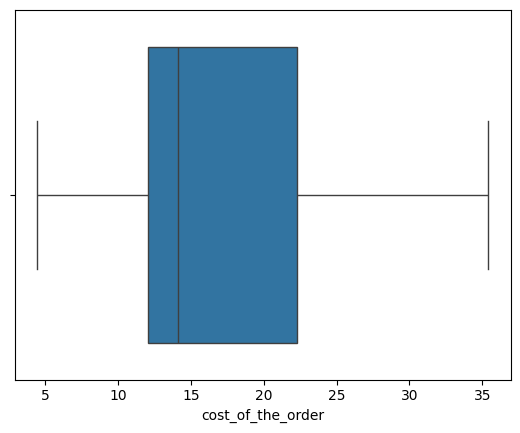

In [ ]:
# Code to plot the histogram for the cost of order
sns.histplot(data=df, x='cost_of_the_order')
plt.show()


# Code to plot the boxplot for the cost of order
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()


#### Delivery time

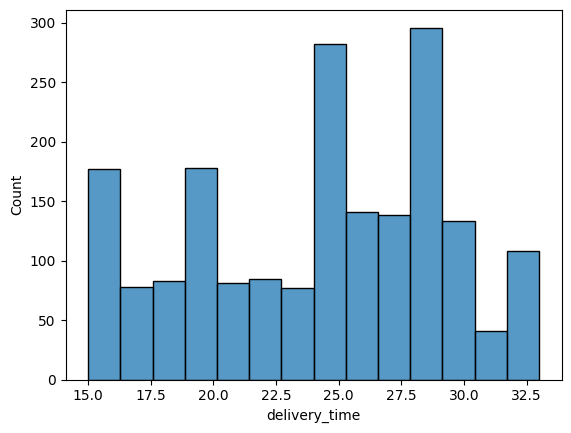

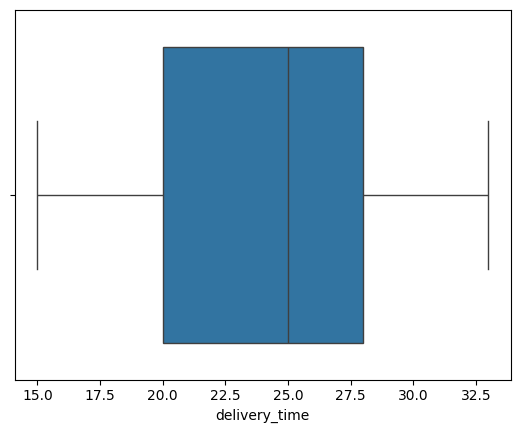

In [ ]:
# Code to plot the histogram for the delivery time
sns.histplot(data=df, x='delivery_time')
plt.show()


# Code to plot the boxplot for the delivery time
sns.boxplot(data=df, x='delivery_time')
plt.show()



# Top 5 restaurants in terms of the number of orders received

In [ ]:
# Top 5 restaurants with highest number of orders

df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


# Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends

df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().idxmax()
df_weekend['cuisine_type'].value_counts() # this was not asked but just did to have overall picture

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


# What percentage of the orders cost more than 20 dollars?


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]


# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


# What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()


print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


# 20% discount vouchers to the top 5 most frequent customers

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)


,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


# Multivariate Analysis

# Explore relationships between the important variables in the dataset.
(It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

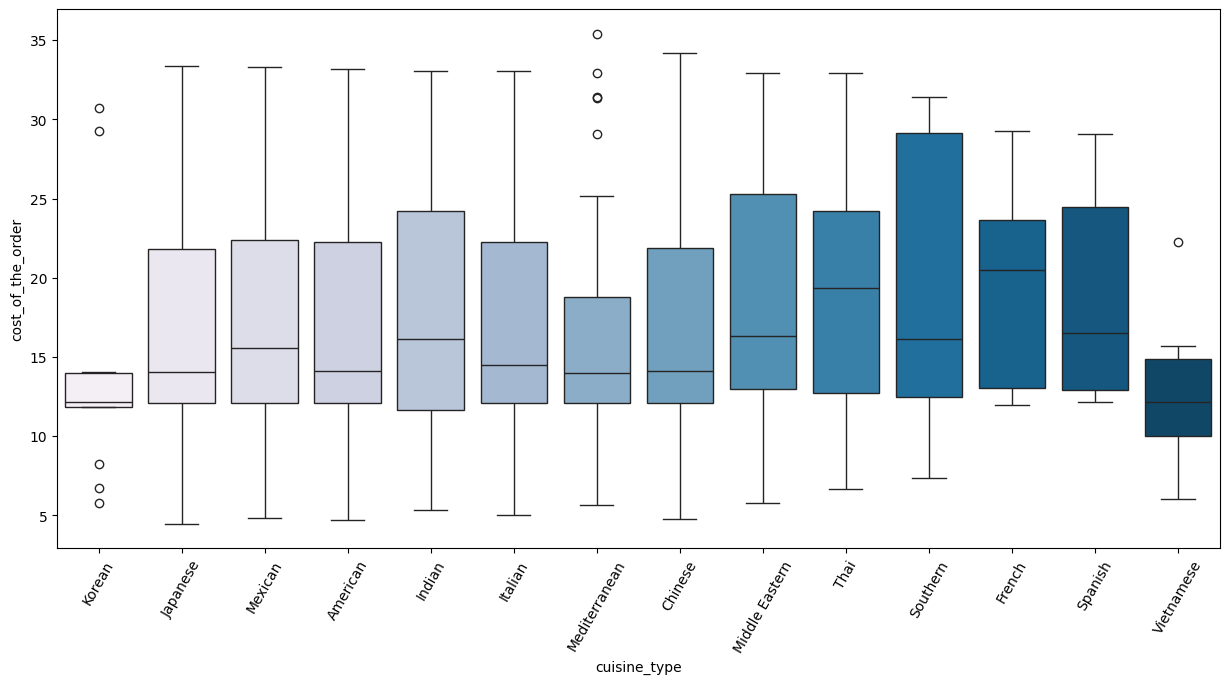

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

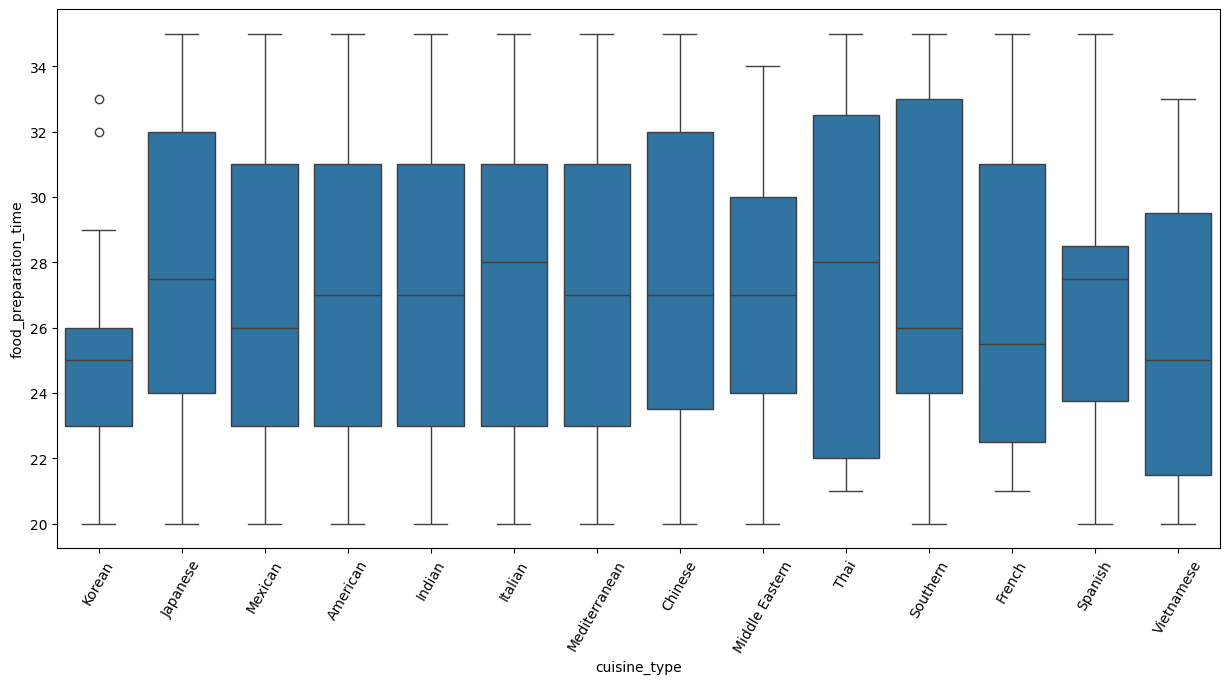

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

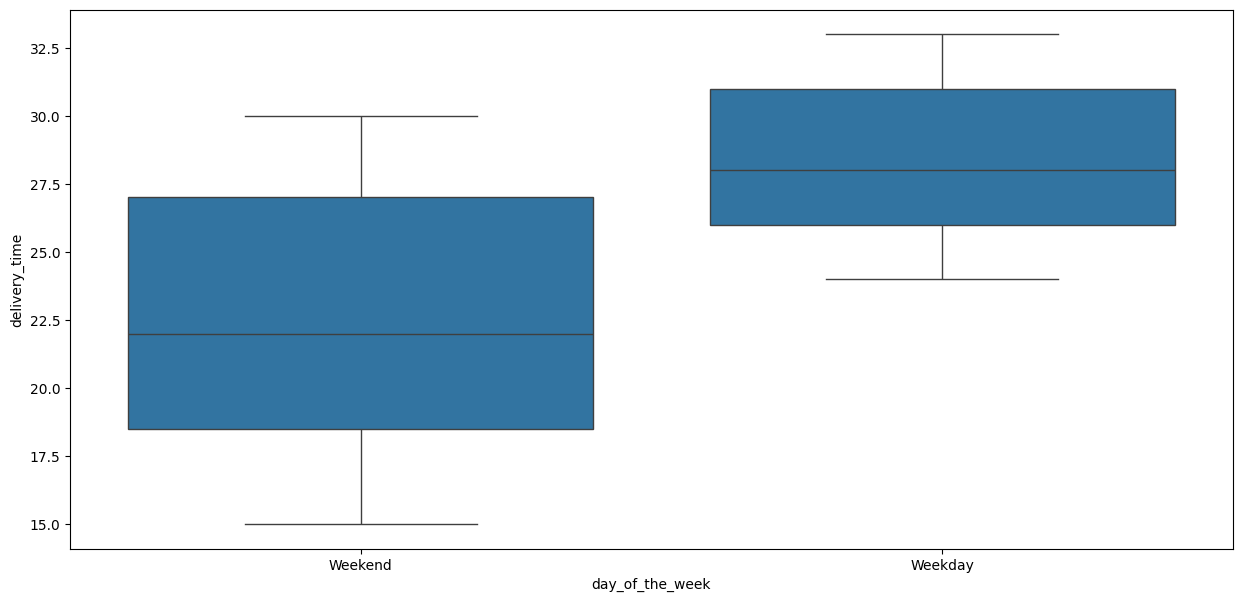

In [ ]:
# Relationship between day of the week and delivery time

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

**Code for observations on the revenue generated by the restaurants.**

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Rating vs Delivery time

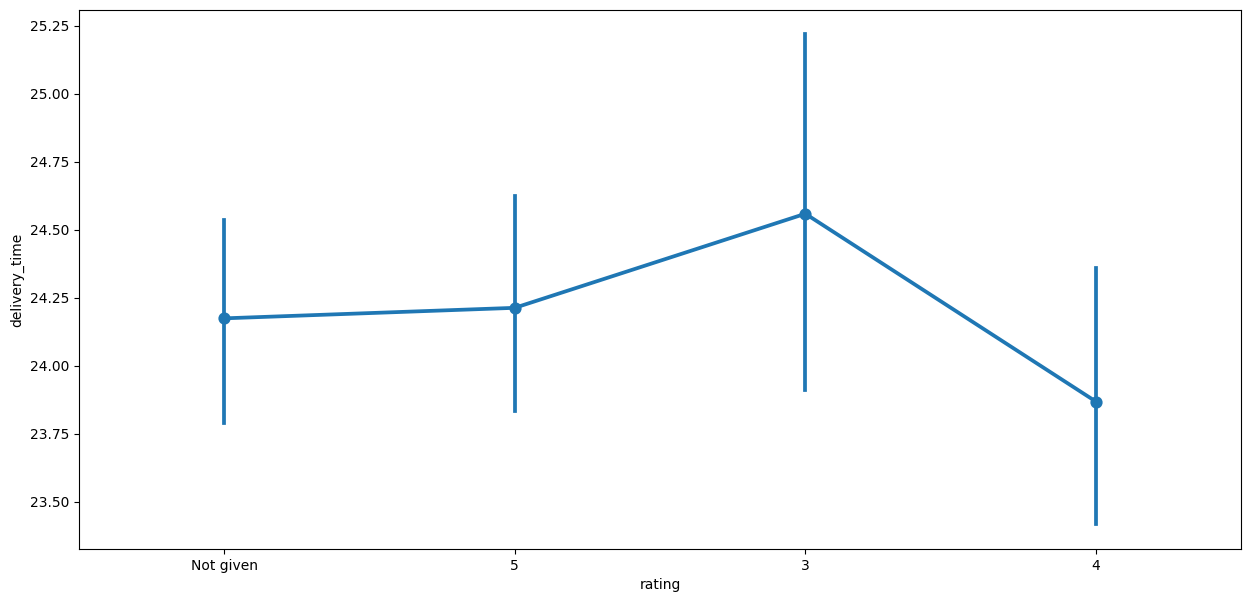

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

<ipython-input-38-bace1282a68e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='rating', y='food_preparation_time', ci=None)


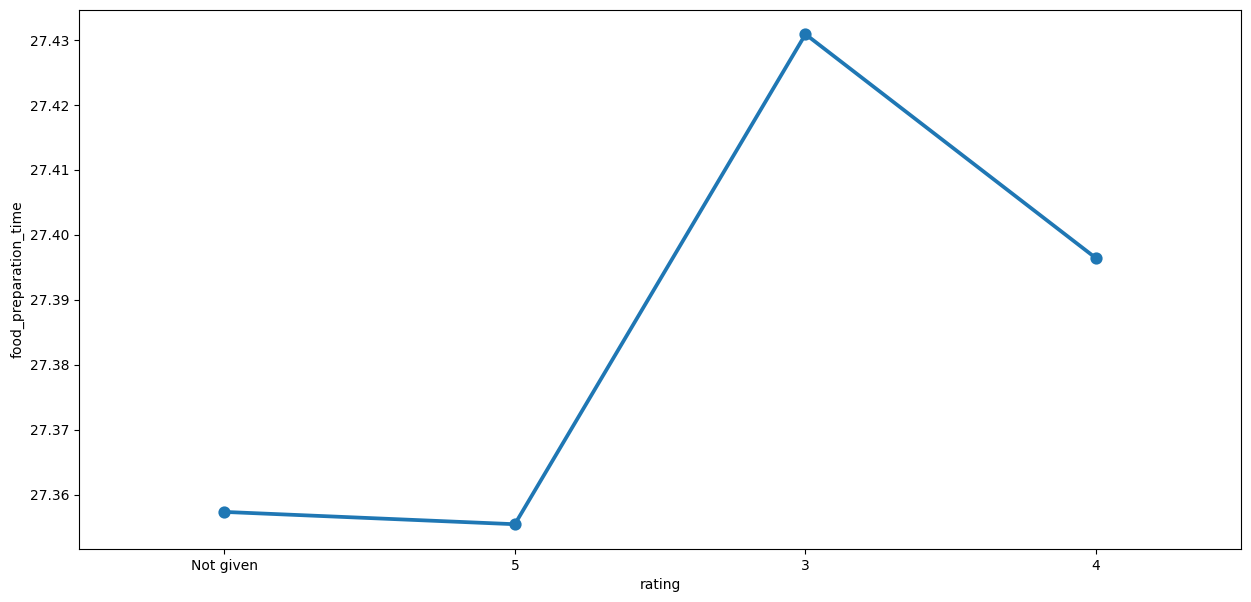

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))

sns.pointplot(data=df, x='rating', y='food_preparation_time', ci=None)
plt.show()

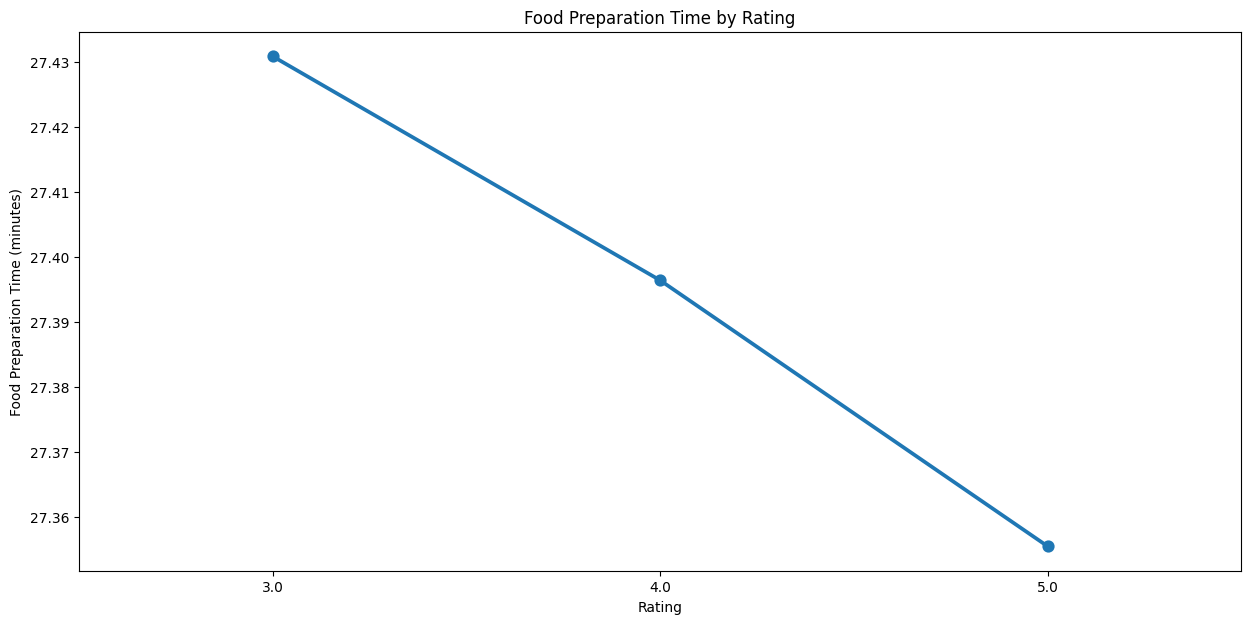

In [ ]:
# following is the code for the above graph:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'rating' to numeric, replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Sort ratings before plotting
df_sorted = df.dropna(subset=['rating']).sort_values(by='rating')

# Plot the relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df_sorted, x='rating', y='food_preparation_time', errorbar=None)
plt.xlabel("Rating")
plt.ylabel("Food Preparation Time (minutes)")
plt.title("Food Preparation Time by Rating")
plt.show()


#### Rating vs Cost of the order

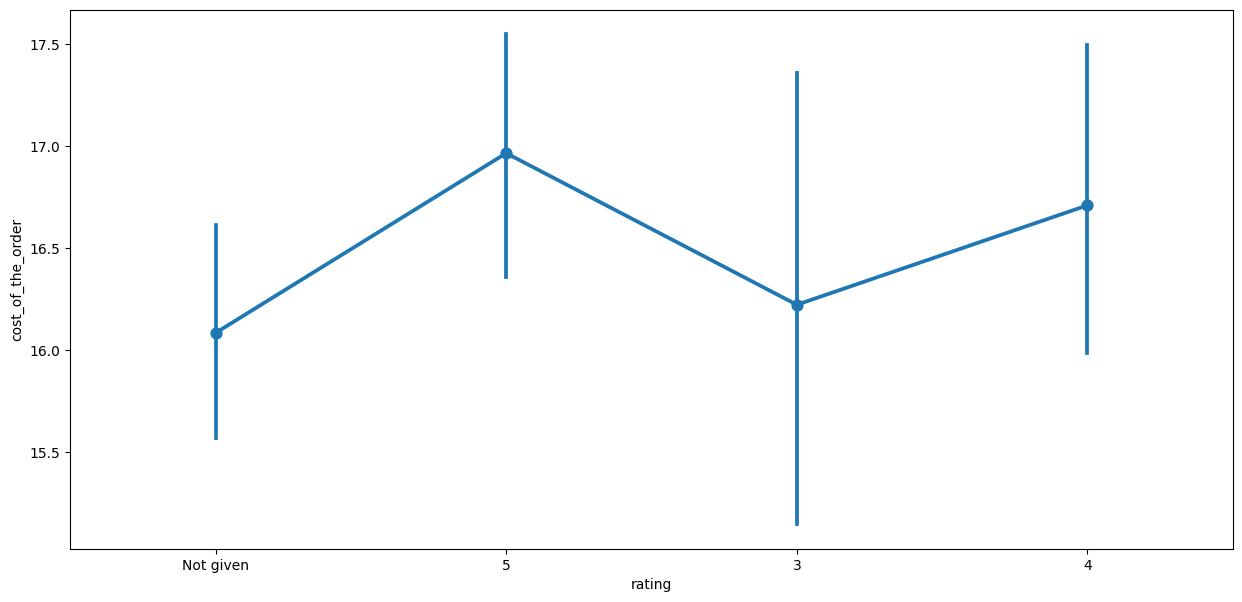

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.show()

#### Correlation among variables

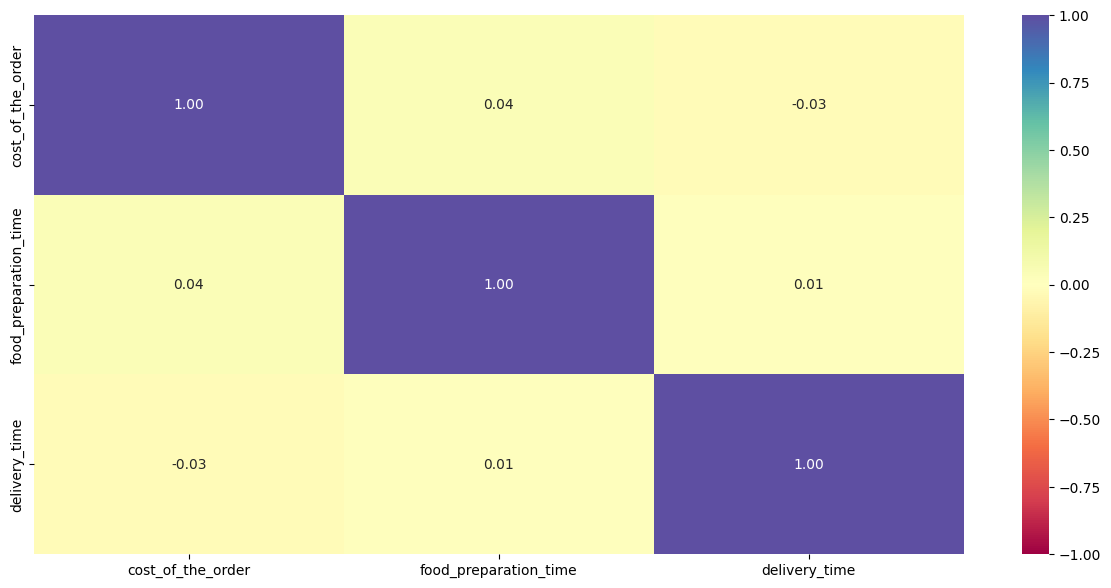

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Top 5 Restaurants fulfilling the criteria of five star ratings to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50

# Convert 'rating' to numeric, setting errors='coerce' to handle 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Count the number of valid ratings per restaurant
df_rating_count = df.groupby('restaurant_name')['rating'].count()

# Filter restaurants with more than 50 ratings
rest_names = df_rating_count[df_rating_count > 50].index.tolist()

# Display the restaurant names
print(rest_names)

############

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

##############

# Group the restaurant names with their ratings and find the mean rating of each restaurant

# Convert 'rating' to numeric, setting errors='coerce' to handle 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant name and calculate the mean rating
df_mean_4_rating = df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

# Display the result
print(df_mean_4_rating)
#############

## Code to find restaurants with rating > 4

# Convert 'rating' to numeric, setting errors='coerce' to handle 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant name and calculate the mean rating
df_mean_4_rating = df.groupby(['restaurant_name'])['rating'].mean().reset_index().dropna()

# Filter for restaurants with an average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

# Display the result
print(df_avg_rating_greater_than_4)
#####################

df_avg_rating_greater_than_4

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']
                   restaurant_name  rating
0                       'wichcraft     5.0
1             Ravagh Persian Grill     5.0
2    Chola Eclectic Indian Cuisine     5.0
3                      Chote Nawab     5.0
4                           Junoon     5.0
..                             ...     ...
151                       Woorijip     3.0
152              Byblos Restaurant     3.0
153                    Pepe Giallo     3.0
154                   Sushi Choshi     3.0
155                Sarabeth's West     3.0

[156 rows x 2 columns]
             restaurant_name    rating
0                 'wichcraft  5.000000
1     Cipriani Le Specialita  5.000000
2    Dig Inn Seasonal Market  5.000000
3              Philippe Chow  5.000000
4                Dos Caminos  5.000000
..                       ...       ...
105             Cafe Mogador  4.153846
106         ilili Restaurant  4.153846
107                   

,restaurant_name,rating
0,'wichcraft,5.000000
1,Cipriani Le Specialita,5.000000
2,Dig Inn Seasonal Market,5.000000
3,Philippe Chow,5.000000
4,Dos Caminos,5.000000
...,...,...
105,Cafe Mogador,4.153846
106,ilili Restaurant,4.153846
107,Parm,4.128205
108,Rubirosa,4.125000


# Company revenue based on order values
**The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.**

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Write the apprpriate column name to compute the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [ ]:
# get the total revenue and print it

total_rev = df['Revenue'].sum()

print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


# Order Delivery times (Prep+Delivery):
The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']



# Percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

orders_above_60 = (df['total_time'] > 60).sum()
total_orders = len(df)
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(orders_above_60)

print(f"Percentage of orders that take more than 60 minutes to get delivered: {percentage_above_60:.2f}%")

200
Percentage of orders that take more than 60 minutes to get delivered: 10.54%


# Delivery Times (weekdays vs weekends)
The company wants to analyze the delivery time of the orders on weekdays and weekends.

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


# Conclusion and Recommendations:
Please refer to the readme file for detailed conclusions and recommendations.

---